<h2 style='color:blue' align='center'>Implementation of stochastic and batch grandient descent in python</h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
13,1100,2,40.00
17,1540,3,60.00
0,1056,2,39.07
8,1310,3,50.00
9,3700,5,167.00


In [3]:
df.shape

(20, 3)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(-1, 1))

In [5]:
scaled_X.shape

(20, 2)

In [6]:
scaled_y.shape

(20, 1)

##### Now is the time to implement mini batch gradient descent. 

In [26]:
def cost_mse(y, y_pred):
    n = y.shape[0]
    cost = (1/n)*sum((y-y_pred)**2)
    return cost   

In [30]:
def batch_gradient_descent_mse(X, y, epochs):
    
    weights = np.random.rand(1, 2)-0.5
    biases = np.random.rand(1,)-0.5
    learning_rate = 0.01
    n = X.shape[0]  
    
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        output_z = X.dot(weights.T) + biases
        
        cost = cost_mse(y.reshape(-1, 1), output_z)
        
        # here y, y_hat are interchanged viceversa to logisticregression
        output_errors = y.reshape(-1, 1) - output_z
        
        gradients = (-2/n)*(output_errors.T.dot(X))
        gradients_biases = (-2/n)*sum(output_errors)
        
        weights = weights - learning_rate*gradients
        biases = biases - learning_rate*gradients_biases
        
        cost_list.append(cost)
        epochs_list.append(i)
        
        # print(f'weigths: {weights} biases: {biases} cost: {cost}')
        
    return weights, biases, cost_list, epochs_list, cost

In [34]:
w, b, cost_list, epochs_list, c = batch_gradient_descent_mse(scaled_X, scaled_y.reshape(-1,), 10000)

In [35]:
w, b, c

(array([[0.80532883, 0.35208596]]), array([-0.10404931]), array([0.00315169]))

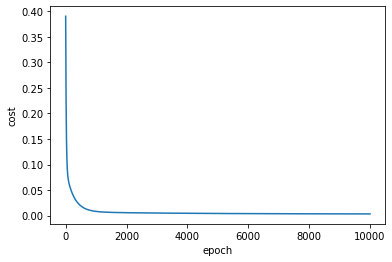

In [36]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochs_list, cost_list)

<h3 style='color:purple'>Stochastic Gradient Descent</h3>

In [89]:
def stochastic_gradient_descent_mse(X, y, epochs, learning_rate = 0.01):
 
    weights = np.random.rand(1, 2)-0.5
    biases = np.random.rand(1,)-0.5
    learning_rate = 0.01
    n = X.shape[0]
    
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):    
        random_index = np.random.randint(0, n)
        
        sample_X = X[random_index].reshape(1, -1)
        sample_y = y[random_index].reshape(-1,)
        
        output_z = sample_X.dot(weights.T) + biases
        
        cost = cost_mse(sample_y.reshape(-1, 1), output_z)
        
        # here y, y_hat are interchanged viceversa to logisticregression
        output_errors = sample_y.reshape(-1, 1) - output_z
             
        gradients = (-2/n)*(output_errors.T.dot(sample_X))
        gradients_biases = (-2/n)*sum(output_errors)
        
        weights -= learning_rate*gradients
        biases -= learning_rate*gradients_biases
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epochs_list.append(i)
        
        
    return weights, biases, cost, cost_list, epochs_list



In [101]:
w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.reshape(-1,), 40000)

In [92]:
w, b, cost

(array([[0.73198931, 0.37545997]]), array([-0.09057215]), array([0.00821975]))

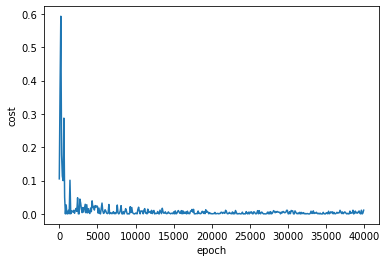

In [102]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [106]:
# from batch gradient descent and sgd weights and biases are almost equal

<h3 style='color:purple'>Mini Batch Gradient Descent</h3>

In [107]:
np.random.permutation(20)

array([16,  7, 17,  8,  0, 14,  9, 18,  5,  3,  1,  2,  4, 10, 11, 13, 15,
       12,  6, 19])

In [137]:
def mini_batch_gradient_descent(X, y, epochs, batch_size):
    
    weights = np.random.rand(1, 2)-0.5
    biases = np.random.rand(1,)-0.5
    learning_rate = 0.01
    n = X.shape[0]
    
    if batch_size > n: # In this case mini batch becomes same as batch gradient descent
        batch_size = n
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(n/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(n)
        X_tmp = X[random_indices]
        y_tmp = y[random_indices]
        
        for j in range(0, n, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            
            output_z = Xj.dot(weights.T) + biases
        
            cost = cost_mse(yj.reshape(-1, 1), output_z)

            output_errors = yj.reshape(-1, 1) - output_z

            gradients = (-2/n)*(output_errors.T.dot(Xj))
            gradients_biases = (-2/n)*sum(output_errors)

            weights = weights - learning_rate*gradients
            biases = biases - learning_rate*gradients_biases
        
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return weights, biases, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(-1,),
    epochs = 10000,
    batch_size = 5
)

In [140]:
w, b, cost

(array([[0.83582748, 0.31315491]]), array([-0.09623141]), array([0.00359987]))

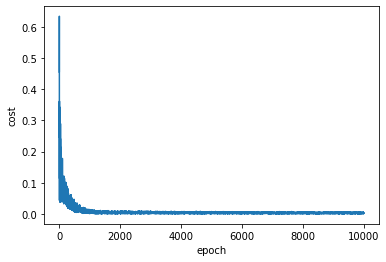

In [139]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [1]:
import numpy as np


def sigmoid(z):
    z = 1 / (1 + np.exp(-z))
    return z


def sigmoid_der(z):
    return sigmoid(z)*(1-sigmoid(z))


class Neural:
    def __init__(self, input_nodes, hidden_nodes_1, hidden_nodes_2, output_nodes):
        self.learning_rate = 0.5

        self.weights_o_h2 = np.random.rand(output_nodes, hidden_nodes_2)-0.5
        self.weights_h2_h1 = np.random.rand(hidden_nodes_2, hidden_nodes_1)-0.5
        self.weights_h1_i = np.random.rand(hidden_nodes_1, input_nodes)-0.5

        self.biases_o = np.random.rand(output_nodes,)-0.5
        self.biases_h2 = np.random.rand(hidden_nodes_2,)-0.5
        self.biases_h1 = np.random.rand(hidden_nodes_1,)-0.5

    def forward(self, X):
        hidden_1_z = X.dot(self.weights_h1_i.T) + self.biases_h1
        hidden_1_a = sigmoid(hidden_1_z)

        hidden_2_z = hidden_1_a.dot(self.weights_h2_h1.T) + self.biases_h2
        hidden_2_a = sigmoid(hidden_2_z)

        output_z = hidden_2_a.dot(self.weights_o_h2.T) + self.biases_o
        output_a = sigmoid(output_z)
        return output_a

    def batch_gradient_descent(self, X, y):
        n = X.shape[0]
        epochs = 5000
        for i in range(epochs):
            hidden_1_z = X.dot(self.weights_h1_i.T) + self.biases_h1
            hidden_1_a = sigmoid(hidden_1_z)

            hidden_2_z = hidden_1_a.dot(self.weights_h2_h1.T) + self.biases_h2
            hidden_2_a = sigmoid(hidden_2_z)

            output_z = hidden_2_a.dot(self.weights_o_h2.T) + self.biases_o
            output_a = sigmoid(output_z)

            output_errors = output_a - y
            gradients_o_h2 = (1/n)*(output_errors.T.dot(hidden_2_a))
            gradients_biases_o = (1/n)*np.array([np.sum(output_errors)],)

            hidden_errors_2 = (output_errors.dot(self.weights_o_h2)) * sigmoid_der(hidden_2_z)
            gradients_h2_h1 = (1/n)*(hidden_errors_2.T.dot(hidden_1_a))
            gradients_biases_h2 = (1/n)*(np.sum(hidden_errors_2, axis=0))

            hidden_errors_1 = (hidden_errors_2.dot(self.weights_h2_h1)) * sigmoid_der(hidden_1_z)
            gradients_h1_i = (1/n)*(hidden_errors_1.T.dot(X))
            gradients_biases_h1 = (1/n)*(np.sum(hidden_errors_1, axis=0))

            self.weights_o_h2 -= self.learning_rate * gradients_o_h2
            self.weights_h2_h1 -= self.learning_rate * gradients_h2_h1
            self.weights_h1_i -= self.learning_rate * gradients_h1_i

            self.biases_o -= self.learning_rate * gradients_biases_o
            self.biases_h2 -= self.learning_rate * gradients_biases_h2
            self.biases_h1 -= self.learning_rate * gradients_biases_h1


X_train = [[0, 0, 0],
           [0, 1, 0],
           [1, 0, 1],
           [1, 1, 1]]
y_train = [[1, 1], [0, 1], [1, 0], [1, 1]]
# y_train = [0, 1, 1, 1]

X_train = np.array(X_train)
y_train = np.array(y_train)
nn = Neural(3, 3, 2, 2)
nn.batch_gradient_descent(X_train, y_train)
print(nn.forward(X_train))


[[0.99767048 0.9975925 ]
 [0.00507047 0.99999697]
 [0.99999728 0.0051415 ]
 [0.9979203  0.99770795]]
